<a href="https://colab.research.google.com/github/xavierw39/Twitter-Text-Analysis/blob/main/Text%20Processing%2C%20EDA%20%26%20Keyword%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
### Background
On April 14, 2022, Elon Musk, the founder of Tesla and SpaceX, announced his intention to acquire Twitter. The acquisition was settled six months later. In these months, many incidents have happened that reflected the confrontations and negotiations between the social platform and the business magnate.

### Project Introduction
This project uses Newsdata API to extract from the web about 5000 Twitter-related news articles from May to November 2022. This project includes:  
* a short description of API data extraction process
* text processing 
* EDA on the news text, and 
* the use of several NLP methods aimed to identify the trending news topics and the buzzwords regarding Twitter

## Analyze the business news titles about Twitter 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import complete data
import pandas as pd
import numpy as np
# news_df = pd.read_csv("/content/drive/MyDrive/Newsdata_Records.csv")
news_df = pd.read_csv("records_2", index_col = 0)
news_df.shape

(4943, 10)

In [6]:
news_df.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description,Date
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,Unknown,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco...",2022-11-29
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,Unknown,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....,2022-11-29
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,Unknown,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...,2022-11-29
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,Unknown,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...,2022-11-29
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,Unknown,Benzinga,United States Of America,Top,English,read more,2022-11-29


## Title Text Analysis

### Normalization
The normalization process include removing accented characters, expand contractions (e.g. can't - cannot), lemmatization, and removing stop words.

In [6]:
news_title = news_df['Title']

In [8]:
## Remove accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode('utf-8', 'ignore')
    return text

In [9]:
news_titles = [remove_accented_chars(title) for title in news_title]
news_titles[:5] 

['"Mark Cuban Calls Elon Musk \'Judge And Jury\' Of His Social Media Company: \'When Do We See Twitter Bill Of Rights?\'"',
 '"Twitter\'s \'Big Bang\'  Elon Musk\'s \'General Amnesty\' Could Bring 62k Suspended Accounts Back"',
 '"Twitter owner Musk signals new \'war\' against Apple"',
 '"Chinese police are now conducting random stop-and-search checks for banned foreign apps such as Instagram and Twitter: reports"',
 '"Twitter Downloads Surge In China Amid Protests Against Xi Jinping\'s Government Despite Ban"']

In [12]:
# !pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 29.0 MB/s eta 0:00:00


In [14]:
## contraction
import contractions
news_titles = [contractions.fix(title) for title in news_title]
news_titles[:5] 

['"Mark Cuban Calls Elon Musk \'Judge And Jury\' Of His Social Media Company: \'When Do We See Twitter Bill Of Rights?\'"',
 '"Twitter\'s \'Big Bang\' — Elon Musk\'s \'General Amnesty\' Could Bring 62k Suspended Accounts Back"',
 '"Twitter owner Musk signals new \'war\' against Apple"',
 '"Chinese police are now conducting random stop-and-search checks for banned foreign apps such as Instagram and Twitter: reports"',
 '"Twitter Downloads Surge In China Amid Protests Against Xi Jinping\'s Government Despite Ban"']

In [15]:
## Lemmatize text
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text]) 
    # return the lemmatized form of the word unless it is a pronoun.
    return text

In [16]:
## remove special character
import re
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    # if we want to remove digits, our matching pattern will be defined as letters only (left), if not we will match numbers as well.
    text = re.sub(pattern, '', text)
    return text

In [17]:
## removing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [48]:
stopword_list.extend(['twitter', 'elon', 'musk']) # to improve our later analysis, we remove these three common words here

In [49]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_text = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_text)
    return filtered_text

In [50]:
def normalize(doc):
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc) # fix contraction
    doc = doc.lower() # lower case
    doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc) # remove extra newlines
    doc = lemmatize_text(doc)
    doc = re.sub(r'([{.(\-)!}])', ' \\1 ', doc) #expand special characters
    doc = remove_special_characters(doc)
    doc = re.sub(r' +', ' ', doc) # remove extra whitespace
    doc = remove_stopwords(doc)
    return doc

In [51]:
news_titles = [normalize(title) for title in news_title]

In [20]:
news_titles[:5]

['mark cuban call elon musk judge jury social medium company see twitter bill right',
 'twitter big bang elon musk general amnesty could bring k suspend account back',
 'twitter owner musk signal new war apple',
 'chinese police conduct random stop search check ban foreign app instagram twitter report',
 'twitter download surge china amid protest xi jinping government despite ban']

### Tokenize and Count


#### Single word

In [52]:
title_tokenized = []
for title in news_titles:
  title_tokenized.extend(word_tokenize(title))

In [22]:
title_tokenized[:5]

['mark', 'cuban', 'call', 'elon', 'musk']

In [53]:
# single words
import collections
collections.Counter(title_tokenized).most_common(15)

[('say', 527),
 ('deal', 494),
 ('account', 346),
 ('new', 248),
 ('takeover', 231),
 ('employee', 231),
 ('report', 226),
 ('whistleblower', 224),
 ('user', 223),
 ('buy', 214),
 ('layoff', 172),
 ('plan', 167),
 ('company', 164),
 ('back', 163),
 ('tweet', 160)]

**Data Exploration**

With the common single words, we can explore the information behind some popular words.

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

title_uni_df = pd.DataFrame(title_tokenized)
uni_counts = title_uni_df.iloc[:,0].value_counts().reset_index()

uni_counts.rename(columns = {0: 'count'}, inplace = True)
uni_counts.head()

,index,count
0,say,527
1,deal,494
2,account,346
3,new,248
4,takeover,231


<Axes: xlabel='count', ylabel='index'>

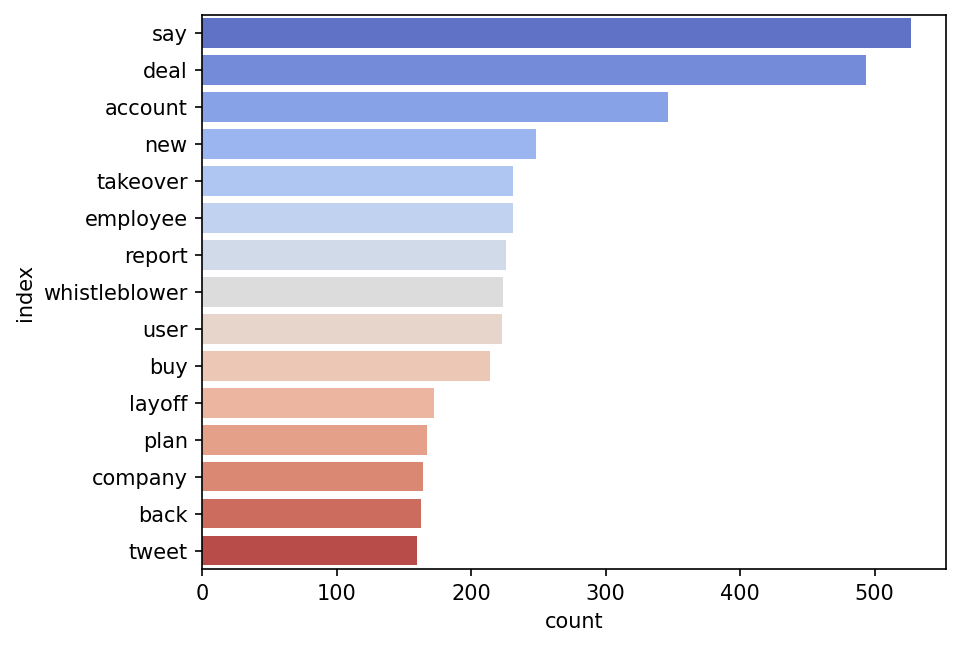

In [55]:
plt.rcParams['figure.dpi'] = 150
sns.barplot(uni_counts.iloc[:15], x = "count", y = "index", palette = 'coolwarm')

From the barplot above we can visualize what are the most common words in the title. It is reasonable to see words like Twitter, Elon Musk, and deal being the most common ones. On the other hand, I am interested by the word "whistleblower". Let me take a look of the articles associated with the word.

In [50]:
news_df[news_df['Title'].str.contains('whistleblower')].Title[:5]

2628    "Musk claims Twitter ordered whistleblower to ...
2645    "Elon Musk’s legal team: Twitter ordered whist...
2836    "Did Twitter whistleblower Peiter Zatko email ...
2936    "Just before Musk backtracked, a judge said Tw...
2996    "Judge says Twitter can search Musk team’s tex...
Name: Title, dtype: object

In [54]:
news_df.loc[2628].Description

"Elon Musk alleges that Twitter Inc. officials ordered a whistleblower to destroy evidence of the company's missteps as part of a $7.8 million severance package at issue in a legal fight over the billionaire's attempt to cancel a buyout of the social media platform."

A further look into the news title reveals that there's a whistleblower inside Twitter called Peiter Zatko who were paid by Twitter to remain quiet about Twitter's "misteps", which may hurt Twitter's buyout value.

#### Bigram

In [56]:
# bigram
from nltk.util import ngrams
title_bigram = [' '.join(e) for e in ngrams(title_tokenized, 2)]
title_bigram[:5]

['mark cuban', 'cuban call', 'call judge', 'judge jury', 'jury social']

In [57]:
collections.Counter(title_bigram).most_common(15)

[('report say', 63),
 ('jack dorsey', 63),
 ('new york', 55),
 ('social medium', 51),
 ('deal buy', 49),
 ('mass layoff', 46),
 ('billion deal', 45),
 ('b deal', 44),
 ('edit button', 42),
 ('blue check', 41),
 ('fake account', 40),
 ('kanye west', 38),
 ('york times', 38),
 ('donald trump', 34),
 ('wall street', 33)]

In [58]:
title_bi_df = pd.DataFrame(title_bigram)
bi_counts = title_bi_df.iloc[:,0].value_counts().reset_index()

bi_counts.rename(columns = {0: 'count'}, inplace = True)
bi_counts.head(15)

,index,count
0,jack dorsey,63
1,report say,63
2,new york,55
3,social medium,51
4,deal buy,49
5,mass layoff,46
6,billion deal,45
7,b deal,44
8,edit button,42
9,blue check,41


Similar to the analysis of single words, common bigrams shows similar topics such as twitter deal, takeover, whistleblower.

## News Content Analysis
After analysis on news title, let's dive into the news content or description to see what more we can find about the news articles. 

# Text Analysis
* ngram analysis on news content
* sentiment analysis on news content

### Basic EDA

In [23]:
news_df.head()

,Title,Article Link,Published Date (Gmt),Author,Publisher,Country,Category,Language,Description,Date
0,"""Mark Cuban Calls Elon Musk 'Judge And Jury' O...",https://www.benzinga.com/news/22/11/29885272/m...,2022-11-29 12:36:03,Unknown,Benzinga,United States Of America,Top,English,"Elon Musk-led Twitter lacks transparency, acco...",2022-11-29
1,"""Twitter's 'Big Bang' — Elon Musk's 'General A...",https://www.benzinga.com/news/22/11/29881698/t...,2022-11-29 11:35:43,Unknown,Benzinga,United States Of America,Top,English,Twitter is going through a rollercoaster ride....,2022-11-29
2,"""Twitter owner Musk signals new 'war' against ...",https://techxplore.com/news/2022-11-twitter-ow...,2022-11-29 09:39:18,Unknown,Phys.org,United States Of America,Technology,English,Twitter owner Elon Musk on Monday opened fire ...,2022-11-29
3,"""Chinese police are now conducting random stop...",https://www.businessinsider.com/chinese-police...,2022-11-29 08:30:16,Unknown,Business Insider,United States Of America,Top,English,Certain foreign social media apps are banned i...,2022-11-29
4,"""Twitter Downloads Surge In China Amid Protest...",https://www.benzinga.com/news/22/11/29882264/t...,2022-11-29 07:48:17,Unknown,Benzinga,United States Of America,Top,English,read more,2022-11-29


In [26]:
news_content = news_df[(news_df['Description'] != "No Description") & (news_df['Description'] != "read more")].Description

In [65]:
news_content[:5]

0    Elon Musk-led Twitter lacks transparency, acco...
1    Twitter is going through a rollercoaster ride....
2    Twitter owner Elon Musk on Monday opened fire ...
3    Certain foreign social media apps are banned i...
5    Twitter saw a surge in downloads in China as p...
Name: Description, dtype: object

In [66]:
# number of business news articles
len(news_content)

4531

In [27]:
# news_content tokenized without losing sentence structure
content_sent_tokens = []
for content in news_content:
  content_sent_tokens.append(word_tokenize(content))

In [28]:
# word counts for each article
word_counts = np.asarray([len(article) for article in content_sent_tokens])
pd.DataFrame({"values": [np.mean(word_counts), np.min(word_counts), np.max(word_counts)]}, index = ["mean", "minimum", "maximum"])

,values
mean,56.509821
minimum,2.000000
maximum,2560.000000


The average length of our news content is 56 words.

<Axes: ylabel='Count'>

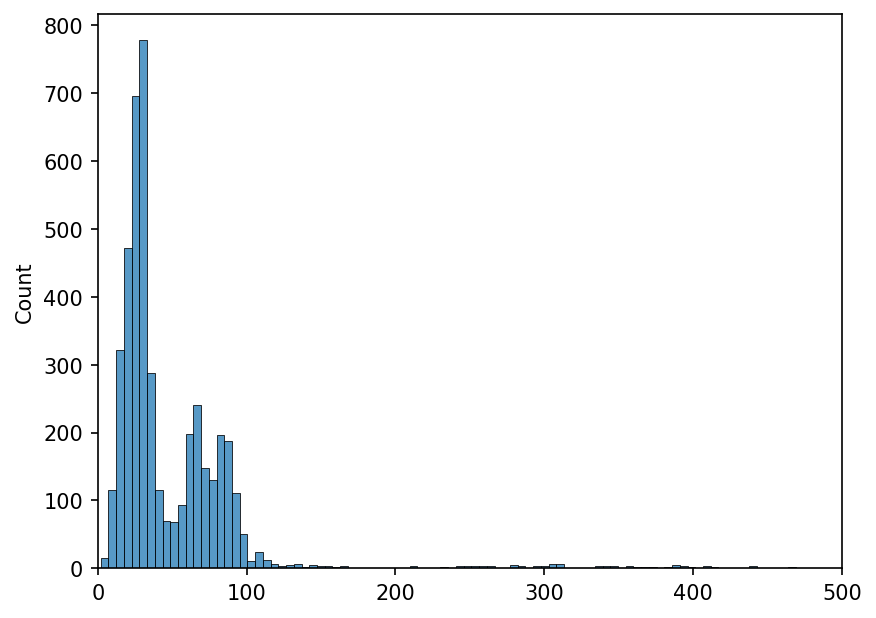

In [83]:
plt.xlim([0, 500])
sns.histplot(word_counts)

<Axes: ylabel='Count'>

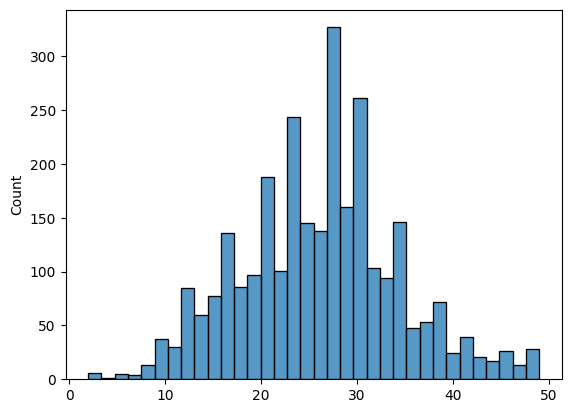

In [32]:
sns.histplot(word_counts[word_counts < 50])

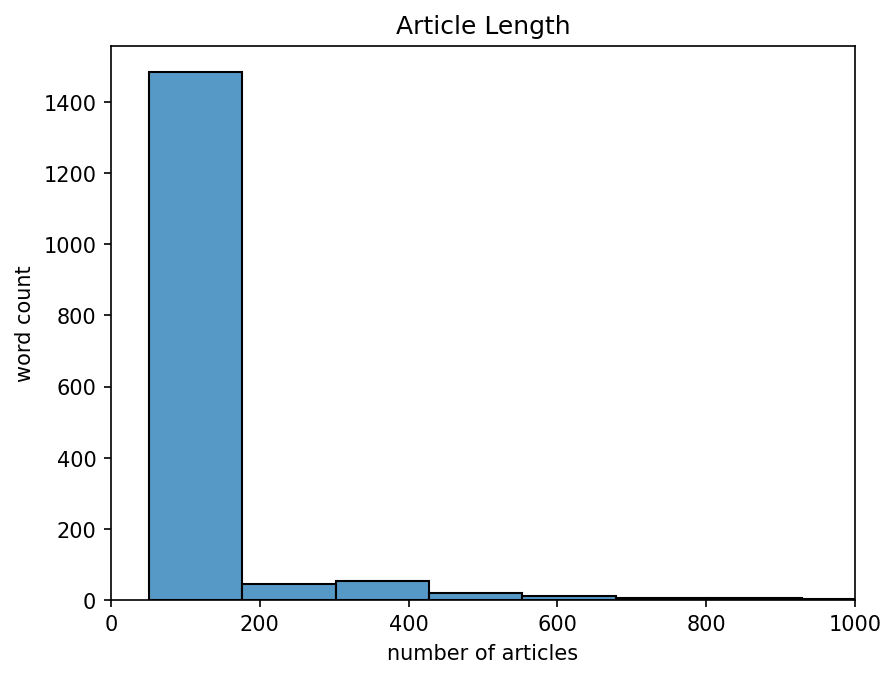

In [86]:
plt.xlim([0, 1000])
sns.histplot(word_counts[word_counts > 50], bins = 20)
plt.title('Article Length')
plt.ylabel('word count')
plt.xlabel('number of articles')
plt.show()

### Content: Bigram Analysis

In [59]:
news_content = [normalize(content) for content in news_content]

content_tokenized = []
for content in news_content:
  content_tokenized.extend(word_tokenize(content))

from nltk.util import ngrams
content_bigram = [' '.join(e) for e in ngrams(content_tokenized, 2)]
content_bigram[:5]

['lead lack',
 'lack transparency',
 'transparency accord',
 'accord dallas',
 'dallas maverick']

In [60]:
collections.Counter(content_bigram).most_common(15)

[('social medium', 767),
 ('full coverage', 429),
 ('coverage google', 429),
 ('google news', 429),
 ('appear first', 331),
 ('medium platform', 289),
 ('tesla ceo', 225),
 ('new york', 206),
 ('medium company', 204),
 ('continue read', 187),
 ('new owner', 149),
 ('social network', 148),
 ('billion deal', 145),
 ('deal buy', 143),
 ('originally publish', 118)]

In [89]:
len(content_bigram)

140837

 ### Keyword Extraction
 In text analysis, we wish to extract the keywords, words that reveal more information than others that can help us better understand the text. The extraction methods we are going to try include TF-IDF and TextRank.

#### TFIDF important keywords

In [61]:
# text data
text_data = news_content

In [62]:
# Extract meaningful bigram key phrases
from collections import defaultdict
bigrams = set()
c = defaultdict(int) # setting defaultdict as int makes it easier for (keyphrase) counting
m = defaultdict(set) # create a dictionary containing each keyphrase
N = len(text_data)

In [63]:
candidate_pos = ['NOUN', 'PROPN', 'ADP']
def isValid(token):
  if token.pos_ in candidate_pos:
    return True
  else:
    return False

In [64]:
for d, sent in enumerate(text_data):
  doc = nlp(sent)
  n = len(doc)
  for i in range(n - 1): # bigrams has 1 less pairs
    if isValid(doc[i]) and isValid(doc[i + 1]):
      pair = (doc[i].text.lower(), doc[i+1].text.lower())
      bigrams.add(pair)
      c[pair] += 1
      m[pair].add(d) 
    # set dictionary records unique indexes of sentences in which the keyphrases appear.

##### TF-IDF Calculation

In [65]:
from math import log

tfidf = defaultdict(int)
# Total number of keyphrase
Nw = sum([val for key, val in c.items()])

for pair in bigrams:
  tf = c[pair] / Nw
  idf = log(N / len(m[pair]))
  tfidf[pair] = tf* idf # map the value of tfidf to pairs

In [66]:
pd.DataFrame(tfidf.items(), columns = ['pair', 'tfidf']).sort_values(
    by = 'tfidf', ascending = False)[:15]

,pair,tfidf
5307,"(coverage, google)",0.019761
23109,"(google, news)",0.019708
14096,"(tesla, ceo)",0.013143
16323,"(new, york)",0.012768
25021,"(medium, platform)",0.009982
27388,"(wall, street)",0.008681
10133,"(content, moderation)",0.007334
31724,"(news, html)",0.006892
7087,"(httpswww, hotnewhiphop)",0.006892
25656,"(washington, post)",0.006821


Although most keywords extracted here are usual words such as news, medium, or name of the news outlets, this list still presents some interesting words such as content moderation, Jack Dorsey, CEO Parag (Agarwal), and Delaware court.

#### Text Rank

In [68]:
candidate_pos = ['NOUN', 'PROPN','ADP']
# vocab_dict
vocab_set = set()

for d, sent in enumerate(text_data):
    doc = nlp(sent)
    for token in doc:
        if isValid(token):
            vocab_set.add(token.text.lower())

# List of keyphrase candidates
vocab_list = list(vocab_set)

In [69]:
vocab_dict = {token:i for i,token in enumerate(vocab_list)}

##### Cooccurrence Matrix

In [70]:
window_size = 8
pairs = defaultdict(int)

for article in text_data:
    doc = nlp(article)
    for i, token_i in enumerate(doc):
        if isValid(token_i):
            for j, token_j in enumerate(doc[i+1:i+window_size]):
                if isValid(token_j):
                    pair = (token_i.text.lower(), token_j.text.lower())
                    pairs[pair] += 1

In [71]:
vocab_size = len(vocab_list)

In [72]:
import numpy as np
# cooccurence matrix
M = np.zeros((vocab_size, vocab_size))

for pair in pairs:
    i = vocab_dict[pair[0]]
    j = vocab_dict[pair[1]]
    M[i,j] = pairs[pair]

# Forming a symmetric matrix 
M = M + M.T - np.diag(M.diagonal())

out = M.sum(axis=1)[:, None]
W = np.divide(M, out, where=out!=0)

In [73]:
# calculate page rank scores (single word)
pr = np.ones(vocab_size)
previous_pr = pr
steps = 100
threshold=1e-5
damping = 0.85

In [74]:
for i in range(steps):
    pr = (1-damping) + damping * pr.dot(W)
    if ((previous_pr - pr)**2).sum() < threshold:
        print(f'Converged in {i+1} steps')
        break
    else:
        previous_pr = pr

Converged in 19 steps


In [75]:
top = np.argsort(pr)[::-1]
[(vocab_list[idx], pr[idx].round(2)) for idx in top[:10]]

[('company', 114.53),
 ('deal', 69.75),
 ('account', 68.1),
 ('platform', 66.17),
 ('post', 60.69),
 ('user', 60.67),
 ('news', 60.49),
 ('ceo', 50.28),
 ('tweet', 48.53),
 ('employee', 41.42)]

In [77]:
# pagerank scores on bigrams
pairs = defaultdict(float)
for review in text_data:
    doc = nlp(review)
    n = len(doc)
    for i in range(n-1):
        w1 = doc[i].text.lower()
        w2 = doc[i+1].text.lower()
        if w1 in vocab_dict and w2 in vocab_dict:
            pair = (w1, w2)
            idx1 = vocab_dict[w1]
            idx2 = vocab_dict[w2]
            pr1 = pr[idx1]
            pr2 = pr[idx2]
            pairs[pair] = (pr1+pr2)/2

In [79]:
keyphrases = [(val, key) for key, val in pairs.items()]
keyphrases.sort()
keyphrases = keyphrases[::-1]
keyphrases[:20]

[(114.53464284270662, ('company', 'company')),
 (92.14241294435772, ('deal', 'company')),
 (92.14241294435772, ('company', 'deal')),
 (91.31877583105543, ('company', 'account')),
 (91.31877583105543, ('account', 'company')),
 (90.35122938596338, ('platform', 'company')),
 (90.35122938596338, ('company', 'platform')),
 (87.6129013887287, ('post', 'company')),
 (87.6129013887287, ('company', 'post')),
 (87.6002954229607, ('user', 'company')),
 (87.6002954229607, ('company', 'user')),
 (87.51308998729795, ('news', 'company')),
 (87.51308998729795, ('company', 'news')),
 (82.40708282764561, ('company', 'ceo')),
 (82.40708282764561, ('ceo', 'company')),
 (81.53206580923346, ('tweet', 'company')),
 (81.53206580923346, ('company', 'tweet')),
 (77.97687446747491, ('employee', 'company')),
 (77.97687446747491, ('company', 'employee')),
 (77.47293088685616, ('report', 'company'))]

The scores from Text Rank does not give us useful information since it tends to return the same word over and over again.

### Bigram Network Graph
As the last part of the notebook, let's use the bigram we created through tfidf to create a network graph to visualize the relationships among bigrams.

In [134]:
tfidf_bigram = pd.DataFrame(tfidf.items(), columns = ['pair', 'tfidf']).sort_values(
    by = 'tfidf', ascending = False)
tfidf_bigram.head(25)

,pair,tfidf
5307,"(coverage, google)",0.019761
23109,"(google, news)",0.019708
14096,"(tesla, ceo)",0.013143
16323,"(new, york)",0.012768
25021,"(medium, platform)",0.009982
27388,"(wall, street)",0.008681
10133,"(content, moderation)",0.007334
31724,"(news, html)",0.006892
7087,"(httpswww, hotnewhiphop)",0.006892
25656,"(washington, post)",0.006821


Here I use the top 25 bigrams to create a network graph

In [175]:
top_bigram = tfidf_bigram['pair'][:10]
top_bigram

5307           (coverage, google)
23109              (google, news)
14096                (tesla, ceo)
16323                 (new, york)
25021          (medium, platform)
27388              (wall, street)
10133       (content, moderation)
31724                (news, html)
7087     (httpswww, hotnewhiphop)
25656          (washington, post)
Name: pair, dtype: object

In [80]:
# !pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


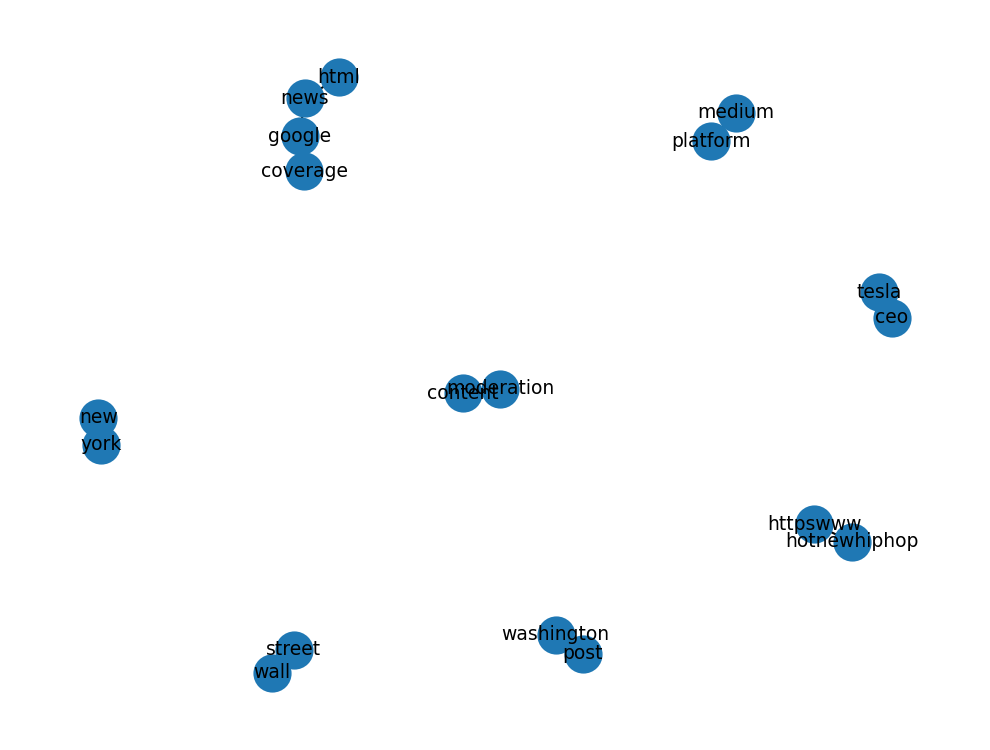

In [176]:
import networkx as nx

# Create a list of bigrams
bigram_list = list(top_bigram)

# we also need a list of our tokenized single words
words = []
for i in bigram_list:
  one, two = i
  words.extend([one, two])

# Create a graph
G = nx.Graph()

# Add nodes to the graph for each unique word in the bigrams
for word in set(words):
    G.add_node(word)

# Add edges to the graph for each bigram
for bigram in bigram_list:
    G.add_edge(bigram[0], bigram[1])

# Draw the graph
nx.draw(G, font_size = 9, with_labels= True)
plt.show()

The bigram from tfidf does not show a valid relationship, so I decide to try out the most common bigrams

In [177]:
common_bigram = collections.Counter(content_bigram).most_common(10)
common_df = pd.DataFrame(common_bigram)
common_df[0]

0      social medium
1      full coverage
2    coverage google
3        google news
4       appear first
5    medium platform
6          tesla ceo
7           new york
8     medium company
9      continue read
Name: 0, dtype: object

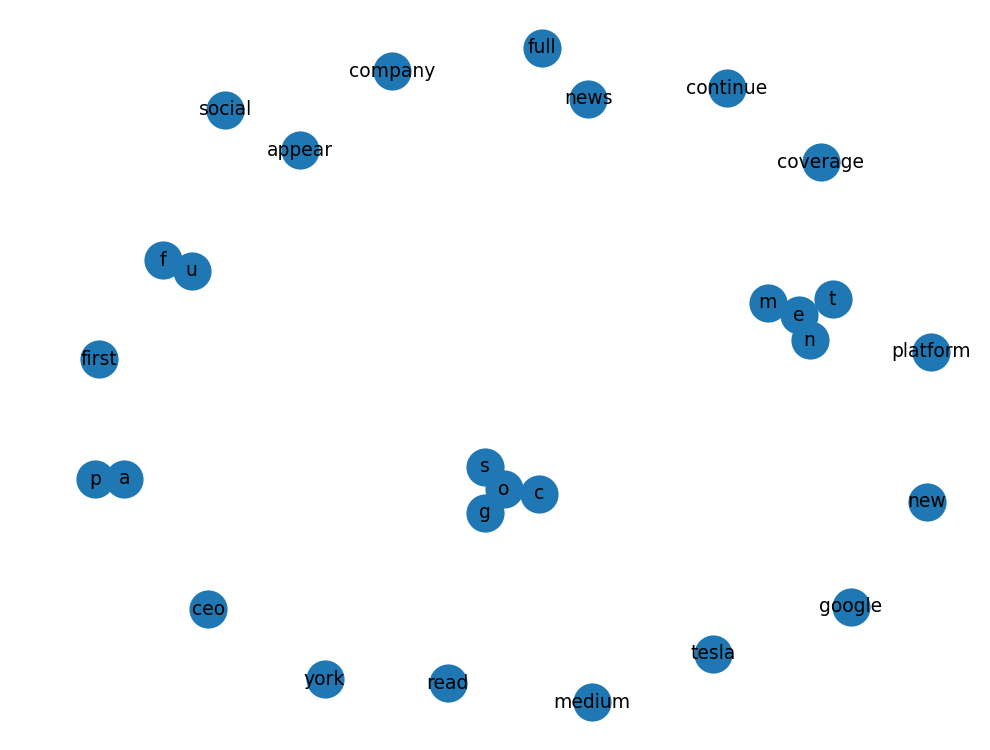

In [179]:
# Create a list of bigrams
bigram_list = list(common_df[0])

# we also need a list of our tokenized single words
words = []
for i in bigram_list:
  
  words.extend(i.split())

# Create a graph
G = nx.Graph()

# Add nodes to the graph for each unique word in the bigrams
for word in set(words):
    G.add_node(word)

# Add edges to the graph for each bigram
for bigram in bigram_list:
    G.add_edge(bigram[0], bigram[1])

# Draw the graph
nx.draw(G, font_size = 9, with_labels= True)
plt.show()

The network graphs shows that there are few connections among the bigrams we have received through either tfidf or common words.



# Conclusion
In this section we perform text processing on the news titles as well as the content, conduct EDA on the content we have, and used 2 keyword extraction methods to analyze important topics of the Twitter-Related news. Finally we draw network graph to visualize the relationships among the words in common bigrams and tfidf keywords bigrams. 

In the next section we will perform sentiment analysis and topic modeling on our news content!